In [3]:
import numpy as np
from PIL import Image
import glob
import matplotlib.pyplot as plt

In [106]:
from skimage.transform import rotate

img_names = [img for img in glob.glob("boxes_for_testing/*")]
img_names.sort() # alphabetical sorting
images = []

for name in img_names:
    images.append(np.asarray(Image.open(name)))
    
labels = [12, 6, 2, 6, 13, 1, 2, 11, 9, 1]
# plus = 9
# minus = 10
# multiplication = 11
# division = 12
# equal = 13
    
tuples = list(zip(images, labels))
test_set = tuples[:]

deg_diff = 10
deg = 0
for i in range(deg_diff, 360, deg_diff):
    test_set += [(Image.fromarray(np.uint8(rotate(image, i)*255)), label) for (image, label) in tuples]

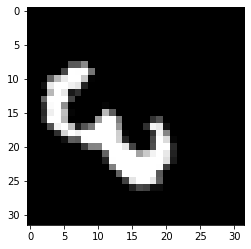

In [112]:
plt.imshow(test_set[232][0], cmap='gray')

In [119]:
import torch

torch.save(test_set, 'video_characters_rotated_tuples.pt')